## Initialization of sorts
This will start by using the same helper functions as in the 'helper' notebook. They work.

In [11]:
import turtle
import numpy as np
import os
import time
import math
import sys
from math import pi
import subprocess
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [12]:
sys.path.append('..')
from py_models.geo_math import *
from py_models.draw_tools import *
from py_models.euclidean_spanner import EuclideanSpanner
from py_models.pointset import Pointset

In [23]:
def getSegmentsFromFile(file_path):
    file = open(file_path, 'r')
    lines = file.readlines()
    
    n = int(lines[0])
    print('N =', n)
    print(lines[1] + lines[2] + lines[3])
    
    parseLine = lambda ln : [[float(ln.split()[0]), float(ln.split()[1])],\
                             [float(ln.split()[2]), float(ln.split()[3])]]
    segments = [parseLine(ln) for ln in lines[4:]]
    
    return segments

## This one uses OLD pathgreedy. Currently maintained here for comparison and testing.
def old_get_and_draw_from_file(file_name, img_w=300, img_h=300):
    # TODO(NOW!!!!!!!!!!!!!!!!!!!!!!!!!!!) Edit the binary below.
    os.system('./printout_path_greedy_test < ' + file_name + ' > temp_file.out')
    time.sleep(1.0)  # Super hacky please fix this
    # It's been six months and I haven't been fixed. There was a reason why calling subroutine didn't work.
    ret = draw_line_segments(getSegmentsFromFile('temp_file.out'), img_w, img_h)
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

def draw_from_pointset(pointset, t=(3+4*np.pi)/3, img_w=300, img_h=300):
    pointset.print_all_to_file('temp_file.in')
    os.system('./printout_general_path_greedy_test ' + str(t) + ' < temp_file.in > temp_file.out')
    time.sleep(1.0)  # Super hacky please fix this
   # It's been six months and I haven't been fixed. There was a reason why calling subroutine didn't work.
    ret = draw_line_segments(getSegmentsFromFile('temp_file.out'), img_w, img_h)
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

N = 11
Planarity: PLANAR
Max degree: 4
Stretch: 3.4582



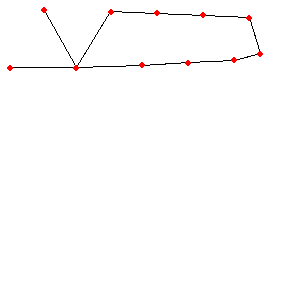

In [29]:
ps = Pointset(file_path='../pointsets/hand/example_deg4_rounded_flipped.txt')
draw_from_pointset(ps)

N = 11
Planarity: PLANAR
Max degree: 4
Stretch: 3.4582



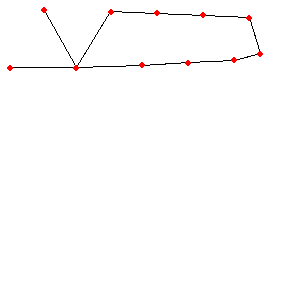

In [25]:
old_get_and_draw_from_file('../pointsets/hand/example_deg4_rounded_flipped.txt')

N = 11
Planarity: NOT PLANAR
Max degree: 4
Stretch: 3.4582



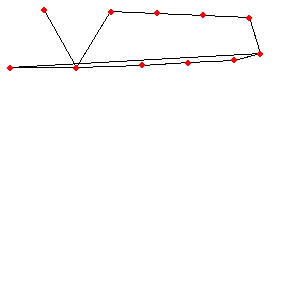

In [30]:
ps.add_before_edge([1, 2])
draw_from_pointset(ps)

In [6]:
ps.add_before_edge([0, 1])
ps.add_after_edge([0, 3])
ps.add_after_edge([5, 6])

In [7]:
ps.print_all()

11 1 2
-48.25 -87.58
-100.0 0.0
278.61 -20.99
262.35 -75.61
239.7 -11.69
192.46 -79.46
169.83 -7.49
122.53 -82.61
99.92 -3.99
52.58 -85.06
0.0 0.0
0 1
0 3
5 6



In [8]:
ps.print_all_to_file()